# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

tome acu
dadukou
port-aux-francais
sinop
whitehorse
napili-honokowai
bredasdorp
port mathurin
st. john's
port mathurin
dudinka
saint-girons
isafjordur
ust'-kulom
ushuaia
olonkinbyen
'ohonua
port-aux-francais
edinburgh of the seven seas
queenstown
thompson
ushuaia
longyearbyen
port-aux-francais
kyzyl-mazhalyk
edinburgh of the seven seas
lewistown
blackmans bay
port-aux-francais
edinburgh of the seven seas
georgetown
margaret river
lebu
puerto natales
kannangad
goundi
longyearbyen
ushuaia
monywa
coquimbo
santa terezinha
puerto natales
namibe
caibarien
grytviken
tsiombe
adamstown
soustons
adamstown
adamstown
korla
port-aux-francais
longyearbyen
kabalo
olinda
portland
adamstown
cargados carajos
puerto ayora
cockburn town
blackmans bay
adamstown
college
alice springs
yellowknife
sines
laguna
daru
springbok
norilsk
puerto natales
hami
whitehorse
magadan
egilsstadir
iqaluit
ciudad bolivar
grytviken
port-aux-francais
sur
wailua homesteads
northam
saipan
nova sintra
grytviken
bethel
grytviken
p

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
query_url = f"{url}appid={weather_api_key}&q=Miami&units=metric"
first_city = requests.get(query_url).json()
pprint(first_city)

Beginning Data Retrieval     
-----------------------------
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 25.7743, 'lon': -80.1937},
 'dt': 1723169339,
 'id': 4164138,
 'main': {'feels_like': 36.37,
          'grnd_level': 1012,
          'humidity': 76,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 29.93,
          'temp_max': 30.57,
          'temp_min': 28.89},
 'name': 'Miami',
 'sys': {'country': 'US',
         'id': 2009435,
         'sunrise': 1723114246,
         'sunset': 1723161720,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 3.6}}


In [73]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1





# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["deg"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tome acu
Processing Record 2 of Set 1 | dadukou
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | sinop
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | napili-honokowai
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | saint-girons
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | ust'-kulom
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | queenstown
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | kyzyl-mazhal

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tome acu,-2.4189,-48.1522,25.85,69,97,14,BR,1723169529
1,dadukou,26.5479,101.7054,27.60,65,71,135,CN,1723169530
2,port-aux-francais,-49.3500,70.2167,2.39,71,60,286,TF,1723169531
3,sinop,41.7711,34.8709,16.82,85,0,154,TR,1723169532
4,whitehorse,60.7161,-135.0538,29.06,26,0,150,CA,1723169533


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index=False)

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City")

# Display sample data
city_data_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
tome acu,-2.4189,-48.1522,25.85,69,97,14,BR,1723169529
dadukou,26.5479,101.7054,27.60,65,71,135,CN,1723169530
port-aux-francais,-49.3500,70.2167,2.39,71,60,286,TF,1723169531
sinop,41.7711,34.8709,16.82,85,0,154,TR,1723169532
whitehorse,60.7161,-135.0538,29.06,26,0,150,CA,1723169533


In [78]:
city_data_df['Lat'].value_counts()

Lat
 50.9333    2
 67.4667    2
-25.3000    2
-17.7500    2
-17.8000    2
           ..
-5.3166     1
-4.6167     1
 4.7485     1
 9.4515     1
 5.4600     1
Name: count, Length: 558, dtype: int64

In [79]:
city_data_df.shape

(563, 8)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [80]:
print(city_data_df.columns)


Index(['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed',
       'Country', 'Date'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


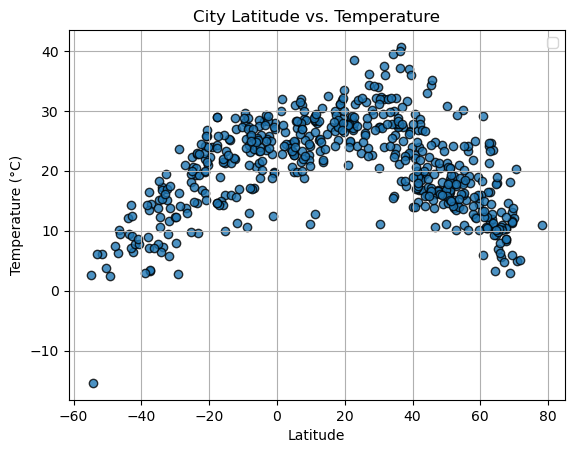

In [81]:

# Assuming your DataFrame is named city_data_df and it contains columns named 'Latitude' and 'Temperature'
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor="black", linewidths=1, marker='o', alpha=0.8)

### Step 3: Incorporate Graph Properties
plt.title('City Latitude vs. Temperature')  # Title of the graph
plt.ylabel('Temperature (°C)')  # Y label
plt.xlabel('Latitude')  # X label
plt.grid(True)  # Adding a grid
plt.legend()  # Adding a legend (not necessary if only one dataset is plotted)

### Step 4: Save the Figure
# Ensure the directory exists
import os
if not os.path.exists("output_data"):
    os.makedirs("output_data")
plt.savefig("output_data/Temperature.png")

### Step 5: Show Plot
plt.show()


#### Latitude Vs. Humidity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


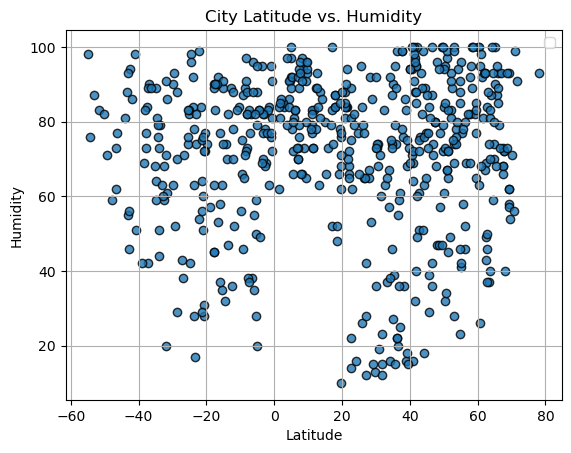

In [83]:
# Assuming your DataFrame is named city_data_df and it contains columns named 'Latitude' and 'Temperature'
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker='o', alpha=0.8)

### Step 3: Incorporate Graph Properties
plt.title('City Latitude vs. Humidity')  # Title of the graph
plt.ylabel('Humidity')  # Y label
plt.xlabel('Latitude')  # X label
plt.grid(True)  # Adding a grid
plt.legend()  # Adding a legend (not necessary if only one dataset is plotted)

### Step 4: Save the Figure
# Ensure the directory exists
import os
if not os.path.exists("output_data"):
    os.makedirs("output_data")
plt.savefig("output_data/Humidity.png")

### Step 5: Show Plot
plt.show()

#### Latitude Vs. Cloudiness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


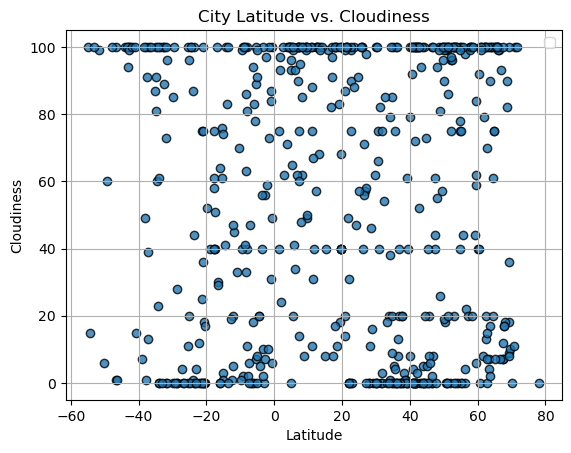

In [84]:
# Assuming your DataFrame is named city_data_df and it contains columns named 'Latitude' and 'Temperature'
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker='o', alpha=0.8)

### Step 3: Incorporate Graph Properties
plt.title('City Latitude vs. Cloudiness')  # Title of the graph
plt.ylabel('Cloudiness')  # Y label
plt.xlabel('Latitude')  # X label
plt.grid(True)  # Adding a grid
plt.legend()  # Adding a legend (not necessary if only one dataset is plotted)

### Step 4: Save the Figure
# Ensure the directory exists
import os
if not os.path.exists("output_data"):
    os.makedirs("output_data")
plt.savefig("output_data/Cloudiness.png")

### Step 5: Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


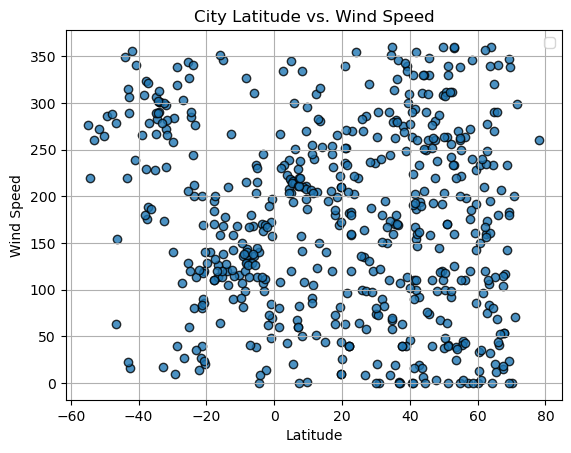

In [85]:
# Assuming your DataFrame is named city_data_df and it contains columns named 'Latitude' and 'Temperature'
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker='o', alpha=0.8)

### Step 3: Incorporate Graph Properties
plt.title('City Latitude vs. Wind Speed')  # Title of the graph
plt.ylabel('Wind Speed')  # Y label
plt.xlabel('Latitude')  # X label
plt.grid(True)  # Adding a grid
plt.legend()  # Adding a legend (not necessary if only one dataset is plotted)

### Step 4: Save the Figure
# Ensure the directory exists
import os
if not os.path.exists("output_data"):
    os.makedirs("output_data")
plt.savefig("output_data/Wind Speed.png")

### Step 5: Show Plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, hemisphere):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.figure(figsize=(10, 5))
    plt.scatter(x_values, y_values, c="yellow", alpha=0.5, edgecolor="black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=14, color="green")
    plt.title(f"{title} - {hemisphere}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    
    print(f"{hemisphere} - Linear Regression:")
    print(f"The r-value is: {r_value:.2f}")
    print(f"The r-squared value is: {r_value**2:.2f}")
    print(f"The p-value is: {p_value:.2f}")
    print("-----------------------------")

In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
dadukou,26.5479,101.7054,27.60,65,71,135,CN,1723169530
sinop,41.7711,34.8709,16.82,85,0,154,TR,1723169532
whitehorse,60.7161,-135.0538,29.06,26,0,150,CA,1723169533
napili-honokowai,20.9708,-156.6705,27.32,81,14,63,US,1723169535
st. john's,47.5649,-52.7093,16.75,80,44,281,CA,1723169250


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
tome acu,-2.4189,-48.1522,25.85,69,97,14,BR,1723169529
port-aux-francais,-49.3500,70.2167,2.39,71,60,286,TF,1723169531
bredasdorp,-34.5322,20.0403,10.58,81,60,283,ZA,1723169536
port mathurin,-19.6833,63.4167,22.36,74,52,128,MU,1723169537
ushuaia,-54.8000,-68.3000,2.60,98,100,276,AR,1723169312


###  Temperature vs. Latitude Linear Regression Plot

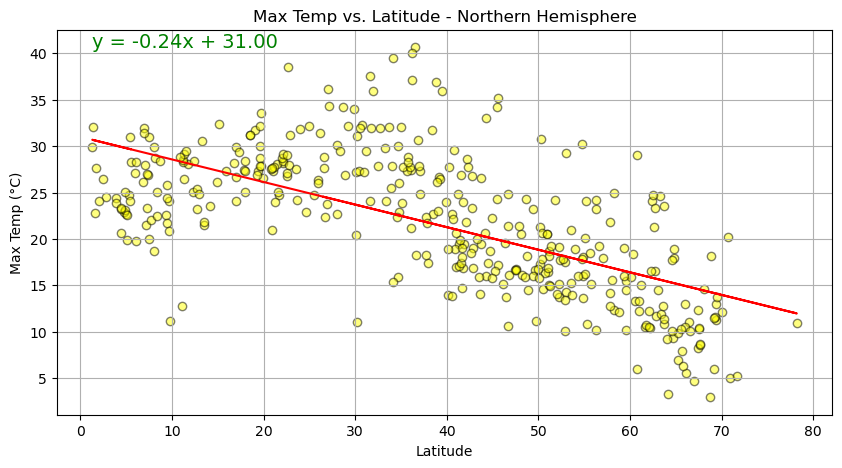

Northern Hemisphere - Linear Regression:
The r-value is: -0.65
The r-squared value is: 0.42
The p-value is: 0.00
-----------------------------


In [91]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Max Temp vs. Latitude", "Latitude", "Max Temp (°C)", "Northern Hemisphere")

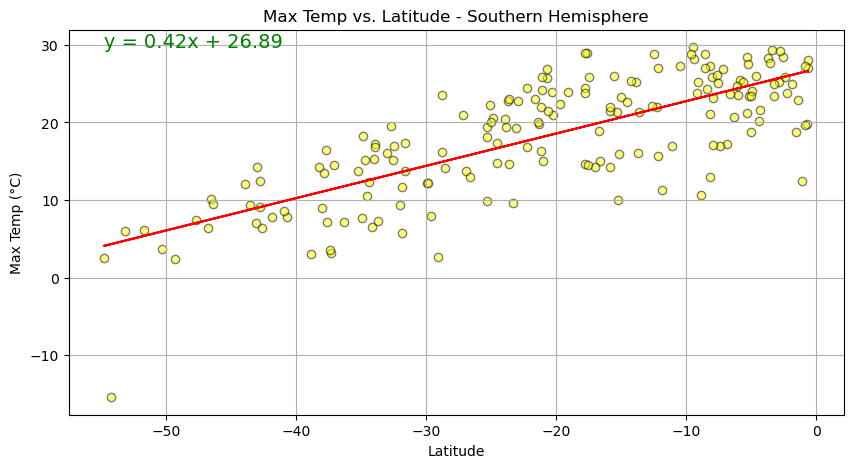

Southern Hemisphere - Linear Regression:
The r-value is: 0.77
The r-squared value is: 0.59
The p-value is: 0.00
-----------------------------


In [92]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Max Temp vs. Latitude", "Latitude", "Max Temp (°C)", "Southern Hemisphere")

**Discussion about the linear relationship:** From the graph above, you can tell that temperature and latitude are proppotional to each other. That is, the lower the latitude, the lower the temperature and the revise is also true. 

### Humidity vs. Latitude Linear Regression Plot

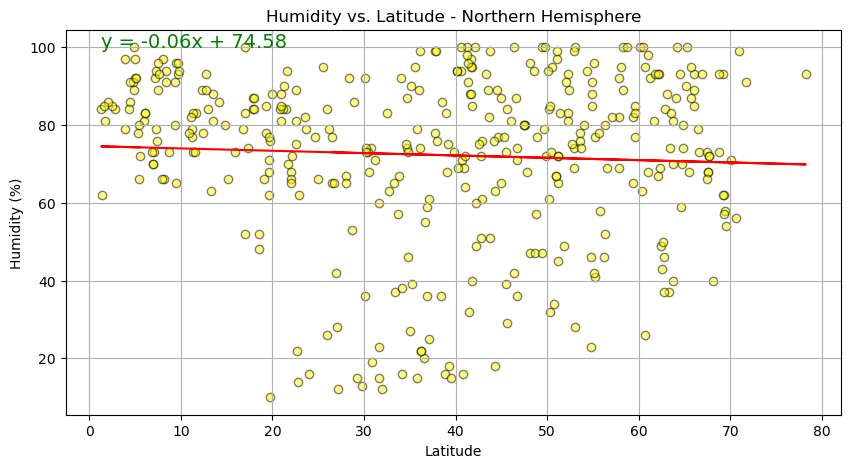

Northern Hemisphere - Linear Regression:
The r-value is: -0.05
The r-squared value is: 0.00
The p-value is: 0.29
-----------------------------


In [93]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern Hemisphere")

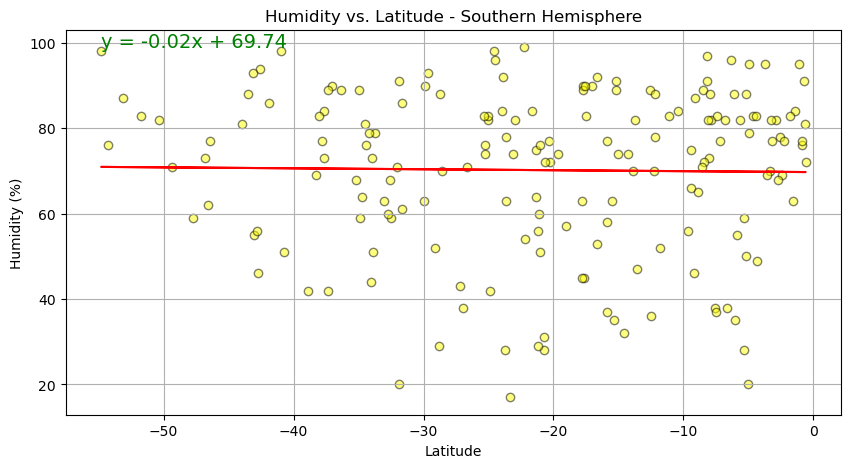

Southern Hemisphere - Linear Regression:
The r-value is: -0.02
The r-squared value is: 0.00
The p-value is: 0.83
-----------------------------


In [94]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** From the graph, you can tell that latitude and humidity are mostly inversely propotional. Other places they are propotional. 

### Cloudiness vs. Latitude Linear Regression Plot

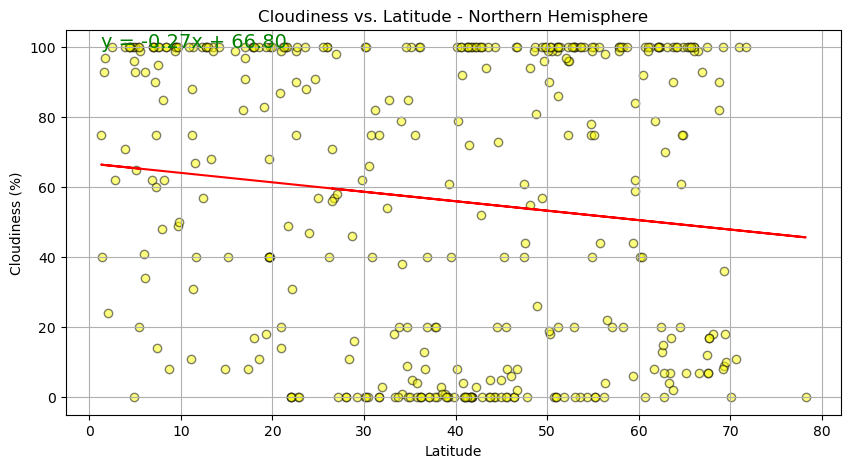

Northern Hemisphere - Linear Regression:
The r-value is: -0.13
The r-squared value is: 0.02
The p-value is: 0.01
-----------------------------


In [95]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern Hemisphere")

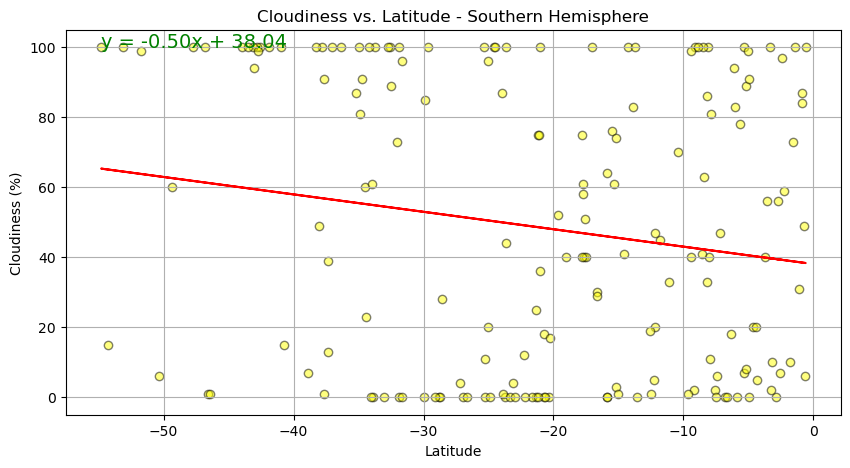

Southern Hemisphere - Linear Regression:
The r-value is: -0.17
The r-squared value is: 0.03
The p-value is: 0.02
-----------------------------


In [96]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** Latitude and Cloudiness are propotional 

### Wind Speed vs. Latitude Linear Regression Plot

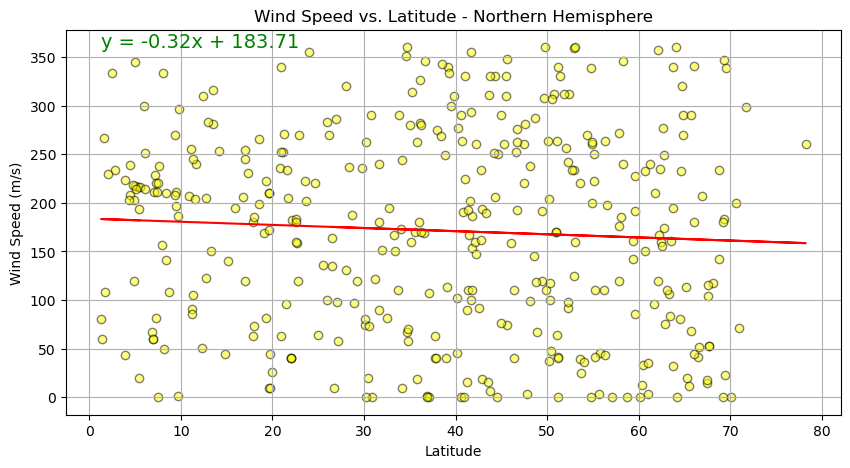

Northern Hemisphere - Linear Regression:
The r-value is: -0.06
The r-squared value is: 0.00
The p-value is: 0.23
-----------------------------


In [97]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Northern Hemisphere")

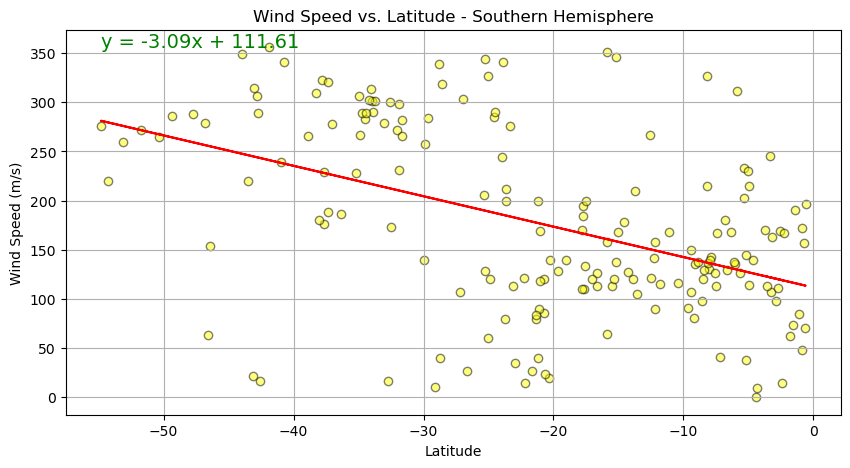

Southern Hemisphere - Linear Regression:
The r-value is: -0.47
The r-squared value is: 0.22
The p-value is: 0.00
-----------------------------


In [98]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Southern Hemisphere")

**Discussion about the linear relationship:** Wind speed and latitude are propotional. Wind speed decreases as latitude does. 